<h1>선형 회귀 분석</h1>

# 라이브러리와 데이터

In [2]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 훈련/평가 데이터 분리
from sklearn.linear_model import LinearRegression    # 선형회귀 모델

In [2]:
# read data
df = pd.read_csv('data03_carseat.csv')
df.head()

,Sales,SalesBin,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06
0,9.50,High,138,73,11,276,120,Bad,42,17,Yes,Yes,38,7,8,16,105,41
1,11.22,High,111,48,16,260,83,Good,65,10,Yes,Yes,21,5,23,12,155,22
2,10.06,High,113,35,10,269,80,Medium,59,12,Yes,Yes,29,7,3,26,195,27
3,7.40,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,81,7,40,23,131,10
4,4.15,Low,141,64,3,340,128,Bad,38,13,Yes,No,71,7,7,11,129,14


# 데이터 세팅

In [3]:
Y = df['Sales']
Xorg = df.iloc[:,2:]

In [4]:
Xorg.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06
0,138,73,11,276,120,Bad,42,17,Yes,Yes,38,7,8,16,105,41
1,111,48,16,260,83,Good,65,10,Yes,Yes,21,5,23,12,155,22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,29,7,3,26,195,27
3,117,100,4,466,97,Medium,55,14,Yes,Yes,81,7,40,23,131,10
4,141,64,3,340,128,Bad,38,13,Yes,No,71,7,7,11,129,14


In [5]:
# making dummy variables
X = pd.get_dummies(Xorg,drop_first=True)

In [6]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,38,7,8,16,105,41,False,False,True,True
1,111,48,16,260,83,65,10,21,5,23,12,155,22,True,False,True,True
2,113,35,10,269,80,59,12,29,7,3,26,195,27,False,True,True,True
3,117,100,4,466,97,55,14,81,7,40,23,131,10,False,True,True,True
4,141,64,3,340,128,38,13,71,7,7,11,129,14,False,False,True,False


In [7]:
xtrain_org, xtest_org, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [8]:
print( xtrain_org.shape, xtest_org.shape )

(50, 17) (50, 17)


# 하나의 변수를 사용한 모델

In [9]:
# using one variables
xtrain = xtrain_org[['Income']]
xtest = xtest_org[['Income']]

In [10]:
f = LinearRegression()
f.fit(xtrain,ytrain)

LinearRegression()

In [11]:
print(f.coef_)

[0.0286964]


In [12]:
print(f.intercept_)

5.447724035778486


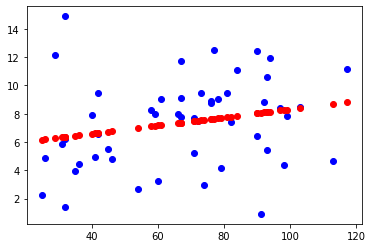

In [14]:
# 훈련 데이터에 대한 예측
yhat_train = f.predict(xtrain)
plt.plot(xtrain,ytrain,'bo',xtrain,yhat_train,'ro')

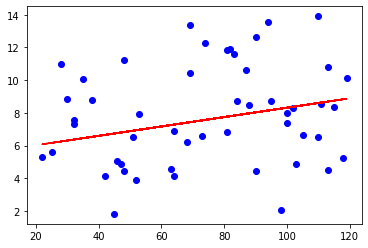

In [15]:
# 평가 데이터에 대한 예측
yhat_test = f.predict(xtest)
plt.plot(xtest,ytest,'bo',xtest,yhat_test,'r-')

In [15]:
# 훈련 데이터에 대한 R2 평가
f.score(xtrain,ytrain)

0.05134515694950703

In [16]:
# 평가 데이터에 대한 R2 평가
f.score(xtest,ytest)

0.018129246562816892

In [17]:
# 훈련 데이터에 대한 RMSE 평가
np.sqrt( ((ytrain-yhat_train)**2).mean() )

np.float64(3.0384678329694825)

In [18]:
# 평가 데이터에 대한 RMSE 평가
np.sqrt( ((ytest-yhat_test)**2).mean() )

np.float64(3.0098250608228505)

# 모든 변수를 다 사용한 모델

In [19]:
xtrain = xtrain_org
xtest = xtest_org

f = LinearRegression()
f.fit(xtrain,ytrain)

LinearRegression()

In [20]:
print(f.intercept_,f.coef_)

3.0337229680839606 [ 1.12029366e-01  2.27645136e-02  2.07930613e-01 -5.48026875e-04
 -9.05831523e-02 -4.02504902e-02 -3.28814056e-02 -4.78899246e-03
 -1.02347172e-01  1.35263800e-02  2.04256841e-03 -4.96267963e-03
  2.13824693e-02  4.75747264e+00  1.57365566e+00  3.17019410e-02
 -7.64112662e-01]


In [21]:
print(f.score(xtrain,ytrain),f.score(xtest,ytest))

0.9365084460305519 0.8574697965573882


# 불필요한 변수를 제거한 모델

In [22]:
xtrain = xtrain_org.iloc[:,[0,1,2,3,4,5,6,13,14,15,16]]
xtest = xtest_org.iloc[:,[0,1,2,3,4,5,6,13,14,15,16]]

f = LinearRegression()
f.fit(xtrain,ytrain)

print(f.score(xtrain,ytrain),f.score(xtest,ytest))

0.9148283997074489 0.8707233967285173


# 연습문제

1. 위의 선형 회귀 모델에서 변수를 세 개만 사용한다고 했을 때, 평가 데이터에서 가장 좋은 성능을 보이는 조합은 어떤 것인가?

In [4]:
df = pd.read_csv('data03_carseat.csv')
X = df.iloc[:,2:-6]
X = pd.get_dummies(X,drop_first=True)
Y = df['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [5]:
# 모든 3개 변수의 조합 생성
var = xtrain.columns
var_combinations = []

# 변수 조합 생성
for i in range(len(var)):
    for j in range(i + 1, len(var)):
        for k in range(j + 1, len(var)):
            var_combinations.append([var[i], var[j], var[k]])

In [6]:
var_combinations 

[['CompPrice', 'Income', 'Advertising'],
 ['CompPrice', 'Income', 'Population'],
 ['CompPrice', 'Income', 'Price'],
 ['CompPrice', 'Income', 'Age'],
 ['CompPrice', 'Income', 'Education'],
 ['CompPrice', 'Income', 'ShelveLoc_Good'],
 ['CompPrice', 'Income', 'ShelveLoc_Medium'],
 ['CompPrice', 'Income', 'Urban_Yes'],
 ['CompPrice', 'Income', 'US_Yes'],
 ['CompPrice', 'Advertising', 'Population'],
 ['CompPrice', 'Advertising', 'Price'],
 ['CompPrice', 'Advertising', 'Age'],
 ['CompPrice', 'Advertising', 'Education'],
 ['CompPrice', 'Advertising', 'ShelveLoc_Good'],
 ['CompPrice', 'Advertising', 'ShelveLoc_Medium'],
 ['CompPrice', 'Advertising', 'Urban_Yes'],
 ['CompPrice', 'Advertising', 'US_Yes'],
 ['CompPrice', 'Population', 'Price'],
 ['CompPrice', 'Population', 'Age'],
 ['CompPrice', 'Population', 'Education'],
 ['CompPrice', 'Population', 'ShelveLoc_Good'],
 ['CompPrice', 'Population', 'ShelveLoc_Medium'],
 ['CompPrice', 'Population', 'Urban_Yes'],
 ['CompPrice', 'Population', 'US_Ye

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
best_score = float(-np.inf)
for comb in var_combinations:
   x_sel = xtest[comb]
   model = LinearRegression()
   cv_score = cross_val_score(model,x_sel,ytest,cv=5)
   score = cv_score.mean()

   if score > best_score:
      best_score = score
      best_features = comb

In [10]:
print("가장 좋은 변수 조합:", best_features)
print("Score:", best_score)

가장 좋은 변수 조합: ['CompPrice', 'Price', 'ShelveLoc_Good']
Score: 0.561896500841045


2. data01_iris에서 Sepal Length를 예측하기 위해 다른 변수로 이용하여 선형 회귀 모델을 학습하시오. 임의로 절반의 데이터는 훈련 데이터로 나머지 절반은 평가 데이터로 사용하시오. 학습된 모델과 훈련 및 평가 데이터에서의 성능을 보고하시오.

In [12]:
df = pd.read_csv('data01_iris.csv')

In [18]:
X = df.iloc[:,1:]
X = pd.get_dummies(X,drop_first=True)
Y = df['Sepal.Length']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [21]:
f = LinearRegression()
f.fit(xtrain,ytrain)

LinearRegression()

In [23]:
print(f.coef_)

[ 0.42643616  0.8932353  -0.37790957 -0.80613621 -1.20617947]


In [24]:
print(f.intercept_)

2.3385868990169967


In [25]:
# 훈련 데이터에 대한 R2 평가
f.score(xtrain,ytrain)

0.9081061991941718

In [26]:
# 평가 데이터에 대한 R2 평가
f.score(xtest,ytest)

0.7898311925820374